In [1]:
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import (BubbleKicker, batchbubblekicker, bubble_properties_calculate, 
                                       _bubble_properties_filter, bubble_properties_plot)

from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [2]:
%matplotlib inline

### Pipelines testing¶

#### Canny canonical method

In [4]:
pwd

u'C:\\Users\\Giacomo\\Documents\\gitRepos\\bubble_size_analysis\\drafts'

{'min': 0.92}
{'max': 1.6, 'min': 0.2}
Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 180 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




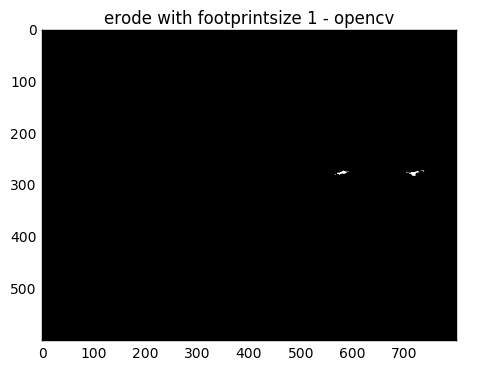

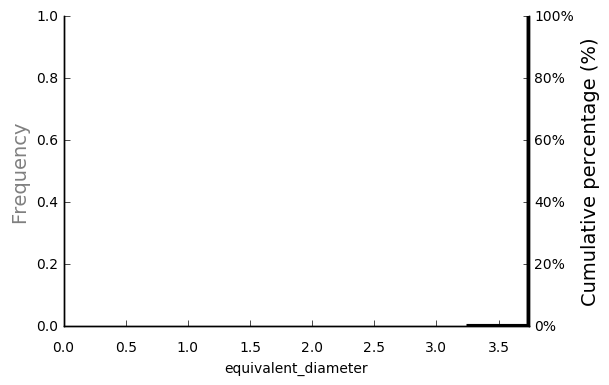

In [15]:
bubbler = CannyPipeline('3411017m_0004.jpg', channel='red') #setup the pipeline by loading the file
result = bubbler.run([120, 180], 3, 3, 1, 1)  # executing the pipeline with custom parameters
marker_image, props = bubble_properties_calculate(result)  # extract the properties
#filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
bubbler.plot()
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot
bubbler.what_have_i_done()
#plt.savefig('BSDhist.png')

#### Adaptive threshold method

{'min': 0.92}
{'max': 1.6, 'min': 0.2}
Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




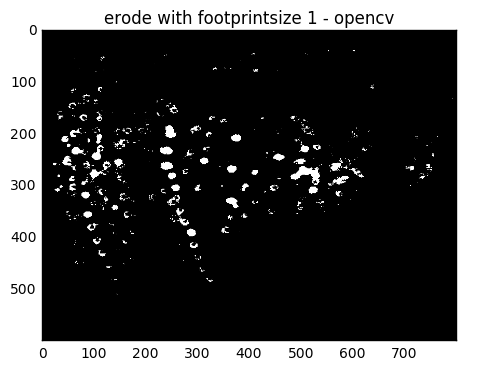

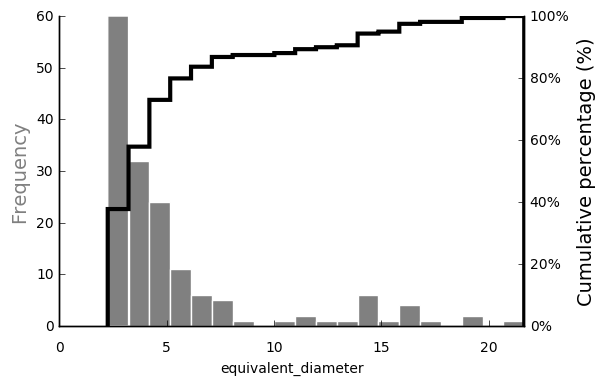

In [14]:
#setup the pipeline by loading the file
bubbler = AdaptiveThresholdPipeline('3411017m_0004.jpg', channel='red') 
result = bubbler.run(91, 18, 3, 1, 1)  # executing the pipeline with custom parameters
bubbler.plot()

marker_image, props = bubble_properties_calculate(result)  # extract the properties 
## nbubbles, to include

#plt.imshow(marker_image, cmap='Greys',  interpolation='nearest')
fig, axs = bubble_properties_plot(props, "equivalent_diameter")  # make a plot
bubbler.what_have_i_done()

### Custom sequence

#### Try a first sequence with [30, 80] custom settings of Canny

Steps undertaken since from raw image:
edge-detect with thresholds 30 -> 80 - opencv
dilate with footprintsize 3 - opencv




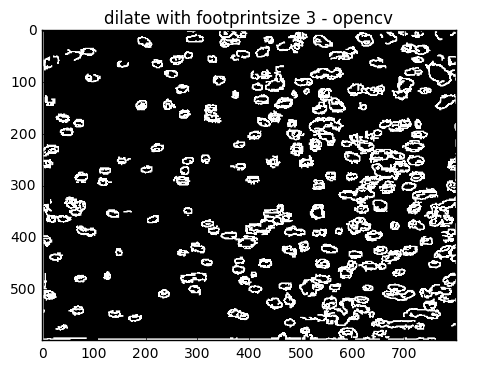

In [5]:
bubbler = BubbleKicker('0325097m_0305.tif', channel='red')
bubbler.edge_detect_canny_opencv([30, 80]) # canny edge detection givin the two parameters to build the gaussian
bubbler.dilate_opencv(3) # dilate using opencv function
bubbler.plot();
bubbler.what_have_i_done()

#### we can see that too many edges are detected, we need to refine, let's now try with [90, 120]¶

Steps undertaken since from raw image:
edge-detect with thresholds 90 -> 120 - opencv
dilate with footprintsize 3 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




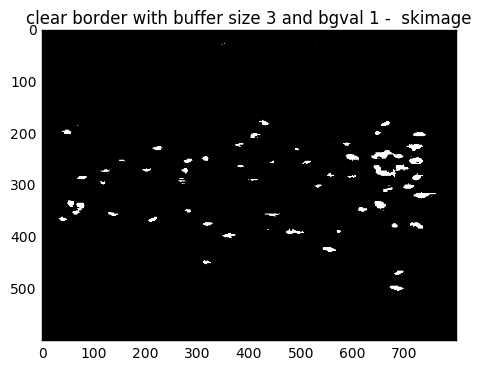

In [6]:
bubbler.reset_to_raw()
bubbler.edge_detect_canny_opencv([90, 120])
bubbler.dilate_opencv(3)
bubbler.clear_border_skimage(3, 1)
bubbler.plot();
bubbler.what_have_i_done()


#### a not adaptive method can be limiting with a uneven background, let's now try the adaptive detection in custom mode¶

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




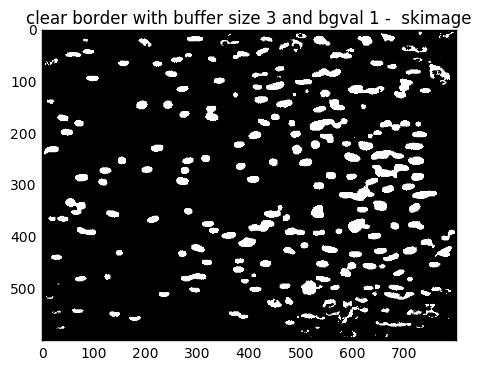

In [70]:
bubbler.reset_to_raw() # here we are running things in default mode
bubbler.adaptive_threshold_opencv()
bubbler.clear_border_skimage()
bubbler.plot()
bubbler.what_have_i_done()

### Now we might be ready to go for a batch of images

In [58]:
res = batchbubblekicker('sample_images', 'red',
                        AdaptiveThresholdPipeline,
                        91, 18, 3, 1, 1)

### Bubble properties

#### bubble properties can be returned as a table¶

{'min': 0.92}
{'min': 0.2, 'max': 1.6}


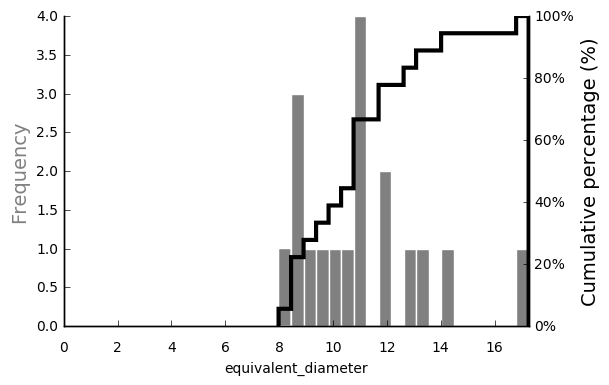

In [98]:
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
marker_image, props = bubble_properties_calculate(result) #output do add nbubbles, 
#print(nbubbles)
fig, axs = bubble_properties_plot(props, "equivalent_diameter")

In [99]:
props.head()

,area,centroid,convex_area,equivalent_diameter,perimeter,convexity,circularity_reciprocal
label,,,,,,,
1,59,"(200.101694915, 646.406779661)",62,8.667245,27.313708,2.160087,1.006235
2,156,"(202.724358974, 726.679487179)",164,14.093451,55.142136,2.829053,1.551075
3,133,"(205.037593985, 409.571428571)",144,13.013103,46.727922,2.846264,1.306446
4,62,"(221.161290323, 586.709677419)",73,8.884866,32.106602,1.931067,1.323083
5,74,"(222.72972973, 380.216216216)",83,9.706685,38.142136,1.940112,1.564474


##### ...for the ease of object selection and futher filtering, based on default parameters

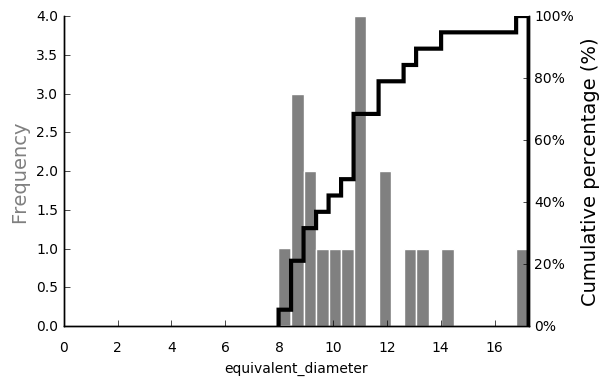

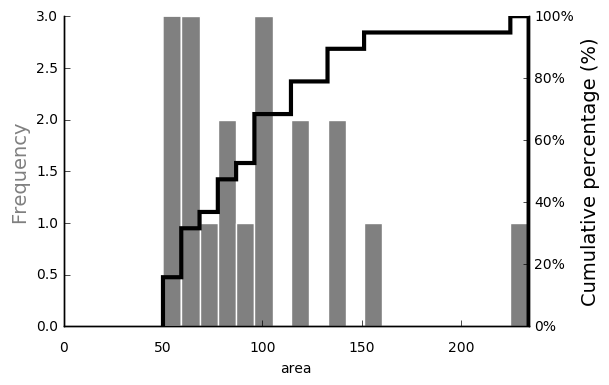

In [101]:
# derive and PLOT the bubble properties as a table with no filter
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
id_image, props = bubble_properties_calculate(result, rules={})
fig, axs = bubble_properties_plot(props, "equivalent_diameter")
#fig.savefig("examples/output_eq_diameter.png")
fig, axs = bubble_properties_plot(props, "area")
#fig.savefig("examples/output_area.png")

##### filter based on custom parameters

{'min': 1.92}
{'min': 0.2, 'max': 1.6}
       area                        centroid  convex_area  equivalent_diameter  \
label                                                                           
1        59  (200.101694915, 646.406779661)           62             8.667245   
2       156  (202.724358974, 726.679487179)          164            14.093451   
3       133  (205.037593985, 409.571428571)          144            13.013103   
4        62  (221.161290323, 586.709677419)           73             8.884866   
5        74   (222.72972973, 380.216216216)           83             9.706685   

       perimeter  convexity  circularity_reciprocal  
label                                                
1      27.313708   2.160087                1.006235  
2      55.142136   2.829053                1.551075  
3      46.727922   2.846264                1.306446  
4      32.106602   1.931067                1.323083  
5      38.142136   1.940112                1.564474  


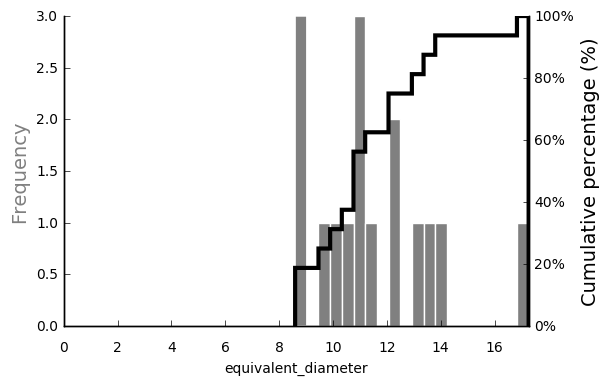

In [106]:
# filter bubble properties based on CUSTOM filter ruleset
custom_filter = {'circularity_reciprocal': {'min': 0.2, 'max': 1.6},
                 'convexity': {'min': 1.92}}
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
id_image, props = bubble_properties_calculate(result, rules=custom_filter)
print(props.head())
fig, axs = bubble_properties_plot(props, "equivalent_diameter")
plt.show()